In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1.Loading the dataset

In [7]:
df=pd.read_csv('US_Accidents.csv')

In [8]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# 2.Data Cleaning
getting all the column names to remove the columns that are not required

In [10]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

dropping the columns not needed

In [15]:
df.drop(['ID', 'Source', 'TMC', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
        'Wind_Chill(F)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
        'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'], axis=1, inplace=True)

Since the dataset has 3513617 rows, we can reduce it to get meaningful results with 50,000 rows. We will shuffle the dataset then take the first 50,000 data entries 

In [16]:
df = df.sample(frac=1).reset_index(drop=True)


In [17]:
df1=df.head(50000)

In [18]:
df1

,Severity,Start_Time,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset
0,3,2017-08-03 10:01:57,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day
1,3,2018-07-11 09:26:52,Denver,CO,80216,84.2,22.0,20.0,Partly Cloudy,Day
2,2,2017-12-21 18:52:38,Tulsa,OK,74115-4911,53.1,61.0,10.0,Mostly Cloudy,Night
3,2,2016-08-14 03:50:04,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night
4,3,2016-08-07 11:02:05,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day
...,...,...,...,...,...,...,...,...,...,...
49995,1,2020-03-23 16:40:50,Maricopa,AZ,85040-2405,75.0,31.0,10.0,Partly Cloudy,Day
49996,2,2019-09-21 07:23:00,Fresno,CA,93725-9202,62.0,56.0,10.0,Fair,Day
49997,4,2018-10-21 20:56:57,Gordon,GA,30701,42.8,76.0,10.0,Clear,Night
49998,3,2020-06-25 17:52:39,DuPage,IL,60439,83.0,41.0,10.0,Fair,Day



 Now we have a dataset that has 50,000 rows and the columns we need, we will start formatting the remaining columns

Since we have a lot of rows we can drop the rows having NaN data values


In [37]:
df2=df1.dropna()
df2.isnull().sum()

Severity             0
Start_Time           0
County               0
State                0
Zipcode              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Sunrise_Sunset       0
dtype: int64

In [43]:
df2

,Severity,Start_Time,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset
0,3,2017-08-03 10:01:57,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day
1,3,2018-07-11 09:26:52,Denver,CO,80216,84.2,22.0,20.0,Partly Cloudy,Day
2,2,2017-12-21 18:52:38,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,Night
3,2,2016-08-14 03:50:04,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night
4,3,2016-08-07 11:02:05,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day
...,...,...,...,...,...,...,...,...,...,...
49995,1,2020-03-23 16:40:50,Maricopa,AZ,85040,75.0,31.0,10.0,Partly Cloudy,Day
49996,2,2019-09-21 07:23:00,Fresno,CA,93725,62.0,56.0,10.0,Fair,Day
49997,4,2018-10-21 20:56:57,Gordon,GA,30701,42.8,76.0,10.0,Clear,Night
49998,3,2020-06-25 17:52:39,DuPage,IL,60439,83.0,41.0,10.0,Fair,Day


Exctracting time from the *start_time* column and creating new *time* column and deleting the *start_time* column

In [44]:
df2['Time'] = pd.to_datetime(df2['Start_Time']).dt.time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df2.drop(labels='Start_Time',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
df2.head()

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day,10:01:57
1,3,Denver,CO,80216,84.2,22.0,20.0,Partly Cloudy,Day,09:26:52
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,Night,18:52:38
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night,03:50:04
4,3,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day,11:02:05


Now we will format the *Zipcode* column

In [47]:
df2['Zipcode']=df2['Zipcode'].apply(lambda x: int(x.split('-')[0]))
df2.head()

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day,10:01:57
1,3,Denver,CO,80216,84.2,22.0,20.0,Partly Cloudy,Day,09:26:52
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,Night,18:52:38
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night,03:50:04
4,3,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day,11:02:05


In [190]:
df3=df2

In [191]:
df3.head()

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,NaN,10
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,NaN,18
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,NaN,3
4,3,San Diego,CA,92124,73.0,66.0,10.0,Overcast,NaN,11
6,2,Travis,TX,78745,46.9,93.0,3.0,Rain,NaN,22


Formatting the *weather_condition* column

In [63]:
df3['Weather_Condition']=df3['Weather_Condition'].apply(lambda x: str(x.split('/')[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df3.Weather_Condition.unique()

array(['Scattered Clouds', 'Partly Cloudy', 'Mostly Cloudy', 'Clear',
       'Overcast', 'Cloudy', 'Rain', 'Fair', 'Light Rain', 'Light Snow',
       'Haze', 'Thunderstorm', 'Heavy Rain',
       'Light Thunderstorms and Rain', 'Smoke', 'Fog', 'Fair ',
       'Mostly Cloudy ', 'Snow', 'Thunderstorms and Rain',
       'Light Drizzle', 'Cloudy ', 'Drizzle', 'Light Freezing Fog',
       'Heavy Thunderstorms and Rain', 'Squalls ', 'Wintry Mix',
       'Heavy Snow', 'Light Rain ', 'Partly Cloudy ',
       'Light Freezing Rain', 'T-Storm', 'Shallow Fog', 'Mist',
       'Light Rain with Thunder', 'Thunder in the Vicinity',
       'Light Freezing Drizzle', 'Blowing Snow', 'Rain ', 'Heavy T-Storm',
       'Patches of Fog', 'Thunder', 'Ice Pellets', 'Heavy T-Storm ',
       'Blowing Dust ', 'Heavy Drizzle', 'Showers in the Vicinity',
       'Blowing Snow ', 'Volcanic Ash', 'Light Snow ', 'Rain Showers',
       'N', 'Heavy Rain ', 'Light Drizzle ', 'T-Storm ',
       'Light Ice Pellets', 'Light Ra

In [70]:
indexNames=df3[df3['Weather_Condition']=='N'].index
df3.drop(indexNames, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df3.size

485440

In [72]:
df3.head()

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day,10:01:57
1,3,Denver,CO,80216,84.2,22.0,20.0,Partly Cloudy,Day,09:26:52
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,Night,18:52:38
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night,03:50:04
4,3,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day,11:02:05


Formatting the *Time* column to get only the hour at which the accident occurs:

In [88]:
df3['Time']=df3['Time'].astype('str')
df3['Time']=df3['Time'].apply(lambda x: str(x.split(':')[0]))
df3['Time']=df3['Time'].astype('int')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [90]:
df3.rename(columns={'Time': 'Time(hour)'})

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Sunrise_Sunset,Time(hour)
0,3,Westchester,NY,10603,75.0,79.0,7.0,Scattered Clouds,Day,10
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Mostly Cloudy,Night,18
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,Night,3
4,3,San Diego,CA,92124,73.0,66.0,10.0,Overcast,Day,11
5,2,Hennepin,MN,55408,21.0,81.0,10.0,Cloudy,Night,7
...,...,...,...,...,...,...,...,...,...,...
49995,1,Maricopa,AZ,85040,75.0,31.0,10.0,Partly Cloudy,Day,16
49996,2,Fresno,CA,93725,62.0,56.0,10.0,Fair,Day,7
49997,4,Gordon,GA,30701,42.8,76.0,10.0,Clear,Night,20
49998,3,DuPage,IL,60439,83.0,41.0,10.0,Fair,Day,17


In [193]:
df3.drop(['Sunrise_Sunset'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Formatting the *Weather_Condition* column

In [195]:
df3 = df3[df3.groupby('Weather_Condition').Weather_Condition.transform('count')>45].copy() 

In [196]:
df3['Weather_Condition'].value_counts()

Clear                           7062
Mostly Cloudy                   5339
Fair                            4819
Overcast                        4175
Partly Cloudy                   3293
Cloudy                          2524
Light Rain                      2370
Scattered Clouds                2062
Rain                             561
Haze                             395
Fog                              356
Heavy Rain                       212
Light Drizzle                    137
Light Thunderstorms and Rain      65
T-Storm                           50
Mostly Cloudy                     46
Name: Weather_Condition, dtype: int64

We can divide the dataset into 2 weather conditions: Clear(having clear and fair weather conditions) and Unclear(having all the other ones)

In [200]:
df3_copy=df3.copy()

In [205]:
def idk(x):
  if  (x=='Clear' or x=='Fair'):
    return 'Clear'
  else:
    return 'Unclear'
df3['Weather_Condition']=df3['Weather_Condition'].apply(idk)
df3.head()


,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,Unclear,10
2,2,Tulsa,OK,74115,53.1,61.0,10.0,Unclear,18
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,Clear,3
4,3,San Diego,CA,92124,73.0,66.0,10.0,Unclear,11
6,2,Travis,TX,78745,46.9,93.0,3.0,Unclear,22


Now we can format the Weather_condition column by giving 0=Clear and 1=Unclear

In [212]:
df3['Weather_Condition']=df3['Weather_Condition'].map({'Clear':0.0, 'Unclear':1.0})
df3.head()

,Severity,County,State,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Time
0,3,Westchester,NY,10603,75.0,79.0,7.0,1.0,10
2,2,Tulsa,OK,74115,53.1,61.0,10.0,1.0,18
3,2,Los Angeles,CA,90012,86.0,51.0,10.0,0.0,3
4,3,San Diego,CA,92124,73.0,66.0,10.0,1.0,11
6,2,Travis,TX,78745,46.9,93.0,3.0,1.0,22


# 3.Visualising the data for outlier removal

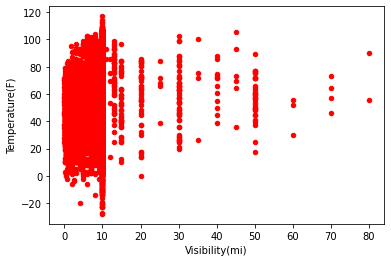

In [79]:
df3.plot(kind='scatter',x='Visibility(mi)',y='Temperature(F)',color='red')
plt.show()

As it is clearly visible most of the 'visibility' values are 10 or lower, hence the values above 10 are *outliers* and they are removed:

In [83]:
indexNames_v=df3[df3['Visibility(mi)']>10].index
df3.drop(indexNames_v, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


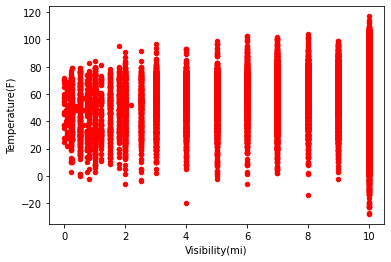

In [85]:
df3.plot(kind='scatter',x='Visibility(mi)',y='Temperature(F)',color='red')
plt.show()

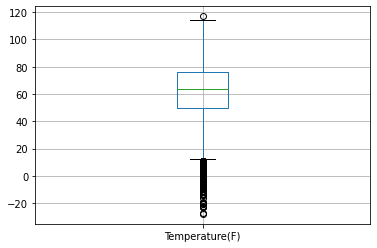

In [98]:
boxplot=df3.boxplot(column='Temperature(F)')

It is clearly visible that the *Temperature(F)* column has a lot of outliers, so we will remove them:

In [102]:
indexNames_tg=df3[df3['Temperature(F)']>90.0].index
df3.drop(indexNames_tg, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
indexNames_tl=df3[df3['Temperature(F)']<40.0].index
df3.drop(indexNames_tl, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


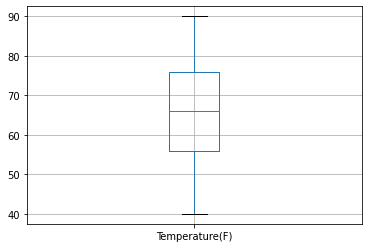

In [104]:
boxplot=df3.boxplot(column='Temperature(F)')

In [106]:
df3.shape

(40087, 10)

Removing the humidity outliers

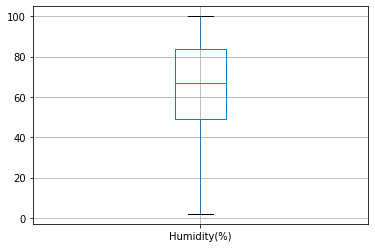

In [107]:
boxplot=df3.boxplot(column='Humidity(%)')

In [114]:
indexNames_h=df3[df3['Humidity(%)']<40.0].index
df3.drop(indexNames_h, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
df3.shape

(33993, 10)

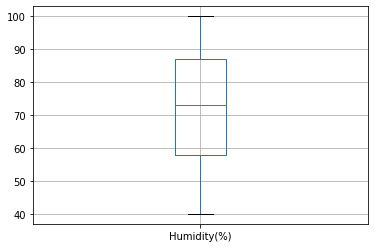

In [116]:
boxplot=df3.boxplot(column='Humidity(%)')

# 4.Model Development
We need to predict the severity of an accident that has the values (1, 2, 3, 4); 1 being mild traffic and 4 being heavy traffic. It is a classification problem that we can solve using K Nearest Neighbors.
## KNN (K Nearest Neighbor)
Importing the library


In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

In [207]:
df3.columns

Index(['Severity', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Visibility(mi)', 'Weather_Condition', 'Time'],
      dtype='object')

In [221]:
X= df3[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Weather_Condition', 'Time']].values.astype(float)
X[0:5]

array([[75. , 79. ,  7. ,  1. , 10. ],
       [53.1, 61. , 10. ,  1. , 18. ],
       [86. , 51. , 10. ,  0. ,  3. ],
       [73. , 66. , 10. ,  1. , 11. ],
       [46.9, 93. ,  3. ,  1. , 22. ]])

In [222]:
y=df3['Severity'].values
y[0:5]

array([3, 2, 2, 3, 2])

## Normalising data
Standardization will give data zero mean and unit variance, which is very helpful for KNN

In [223]:
X = preprocessing.StandardScaler().fit(X).transform(X1.astype(float))
X[0:5]

array([[-5.03719849, -4.16488781, -4.47066476,  0.20255382, -2.33559611],
       [-5.17152487, -4.22608553, -3.86654239,  0.20255382, -2.04532264],
       [-4.96972862, -4.26008426, -3.86654239, -4.16464099, -2.58958539],
       [-5.04946574, -4.20908617, -3.86654239,  0.20255382, -2.29931192],
       [-5.20955334, -4.11728959, -5.27616126,  0.20255382, -1.90018591]])

## Train Test Split
We will split the data into two parts, one for training the model one for testing the out of sample accuracy of our model. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive.

In [224]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26772, 5) (26772,)
Test set: (6694, 5) (6694,)


## Classification

We will define a function that will provide us with the best value of 'k' for our KNN algorithm

In [225]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6528234239617567 with k= 8


## Training
we can train the model with k=8 now

In [226]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

# 5.Predicting 


In [227]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 2])